<a href="https://colab.research.google.com/github/bashirsadat/AirLiquideChallenge/blob/main/Bashir_Sadat_AirLiquide_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
* (1) please find attached dataset to use for this project
* (2) do any data cleaning and explorations 
* (3) **Business problem predict customer level  sales 
   by Product ID,Category,Sub-Category or Product Name, state why you chose a particular product level to predict.**
* (4) write up your work in a well articulated Google Slide (or PowerPoint) presentation or notebook
* (5) create a public GitHub repos and share the link where you are done
* (6) send me an email when you are done so we can schedule your technical interview where you are going to talk about your project.

You have 5 days to complete and submit from the date you receive this. If you are not available please reach out to arrange a different day.

#Getting the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls /content/gdrive/MyDrive/0Lehigh/Jobs/2022/AirLiquide/data

'Sample - Superstore.csv'   submission.csv


In [ ]:
%cd /content/gdrive/MyDrive/0Lehigh/Jobs/2022/AirLiquide/data

/content/gdrive/MyDrive/0Lehigh/Jobs/2022/AirLiquide/data


In [ ]:
raw_df = pd.read_csv('Sample - Superstore.csv', encoding= 'unicode_escape')

## All the imports and global settings

In [ ]:
import pandas as pd
import numpy as np
import os #just in case we might need it
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import r2_score

# Exloratory Data Analysis

In [ ]:
raw_df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   
3        33311  South  FUR-TA-10000577        Furniture       Tables   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

**Let's view some basic information about the data frame.**

In [ ]:
raw_df.shape

(9994, 21)

* There are 21 features (columns) in data, and 9994 rows.



In [ ]:
#See what columns we have
raw_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
#checking for datatypes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

* We see that most of our columns are object type, that means that python could not determine their data type, in our case they are our categorical variables

In [ ]:
#summary of dataset's numerical values, we are going to find out about categorical data later
raw_df.describe()

Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

Write some description of the above table here: **it is important**

---



In [ ]:
#checking for null values
raw_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

* This is good news we don't have any missing values




In [ ]:
#no. of duplicated rows
raw_df.duplicated().sum()

0

In [ ]:
#unique no. of rows in each columns
raw_df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

* The data is only for 1 country. We can remove the country column.
* Our data covers the details of sales of 49 states, 531 cities divided in 4 different regions.
* We can also remove ShipDate and OrderDate because they might not be useful in our anlysis, let's keep them for now
* There 531 cities and 631 postal codes, each city will have one or more postal codes, so we need to keep one or the other, if we want to granualr representation we keep postal codes other wise city will suffice, ore we can make a city plus postal code variable, let's keep exploring. To make it easier let's just keep city and remove the postalcode

In [ ]:
#dropping unnecessary  columns
pr_df= raw_df.drop(['Country', 'Postal Code', 'Row ID'], axis=1)

### Region

In [ ]:
raw_df[['City','State', 'Region']].nunique()

City      531
State      49
Region      4
dtype: int64

There are only four regions. Looking at the data, we can see that we have three categorical variables, which are related.
* City :- Having the most number of unique values
* State :- Having number of unique values less than city
* Region :- Only four unique values

### Categories

In [ ]:
raw_df[['Category','Sub-Category']].nunique()

Category         3
Sub-Category    17
dtype: int64

There are only two categories. 

* Category :- Having the leaset number of unique values
* Sub-Category :- Having the most number of unique values


### Correlations

In [ ]:
# The correlation matrix will be among the continious variables or numeric variables 
# which are:'Sales','Quantity','Discount','Profit' : we will figure out the non-continous ones later
corr_mat = pr_df.corr()
corr_mat

Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000

The table aboves shows the relations of each numeric variables to each other, we can see that profit and sales have the highest correlation which is in positive direction while discount and profit have negative correlation. Quanity 
and Sales also have a noticeable correaltion.
* They can all be better understood in a heatmap table, see bellow:

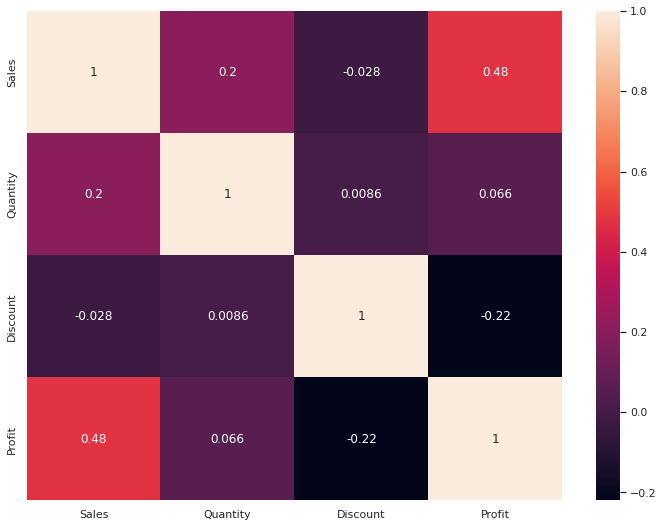

In [ ]:
#plotting correlation matrix
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,annot=True)
plt.show()

* We can see that this heatmap shows it better, but does not do good with negative values we can find away to figure out this later

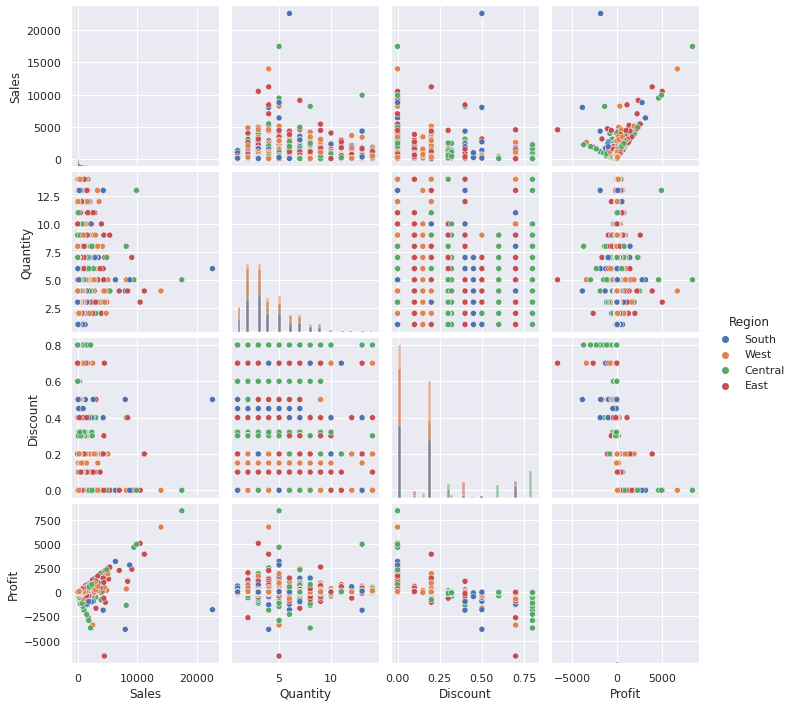

In [ ]:
#plotting pair plot (Region wise)
sns.pairplot(pr_df, hue='Region' , diag_kind="hist")

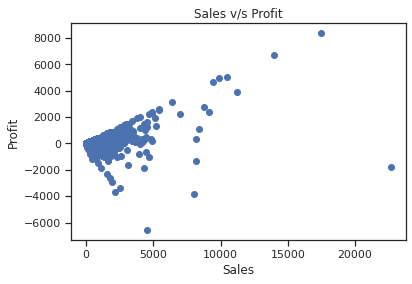

In [ ]:
#scatter plot of sales and profit
plt.scatter(pr_df['Sales'],pr_df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()

* At lower sales,  profit can be positive (profited) or negative(loss). But, when the sales are high, profit is mostly high.
* This scatter plot alos shows us what the the outliers in our data sets, 
** Looks like anything about around 12000 sales and and 6000 profit is outlier
** To look closer we can see that bulk of the data lies under around 7000 in sales and 3000 in profits, let's keep exploring we can find more data.

In [ ]:
#plotting profit v/s sales statewise
profit_to_sales = pd.DataFrame(pr_df.groupby('State').sum()[['Sales','Profit']])
profit_to_sales['Profit_to_sales'] = profit_to_sales['Profit']/profit_to_sales['Sales']
profit_to_sales.sort_values(by='Profit_to_sales',inplace = True, ascending = False)
print("Highest 10 Ratios :\n")
print(profit_to_sales[:10])
print('='*70)
print("Lowest 10 Ratios:\n")
print(profit_to_sales[-10:])

Highest 10 Ratios :

                          Sales      Profit  Profit_to_sales
State                                                       
District of Columbia   2865.020   1059.5893         0.369837
Delaware              27451.069   9977.3748         0.363460
Minnesota             29863.150  10823.1874         0.362426
Maine                  1270.530    454.4862         0.357714
Arkansas              11678.130   4008.6871         0.343264
Indiana               53555.360  18382.9363         0.343251
Georgia               49095.840  16250.0433         0.330986
Montana                5589.352   1833.3285         0.328004
Rhode Island          22627.956   7285.6293         0.321975
Michigan              76269.614  24463.1876         0.320746
Lowest 10 Ratios:

                      Sales      Profit  Profit_to_sales
State                                                   
Florida          89473.7080  -3399.3017        -0.037992
Oregon           17431.1500  -1190.4705        -0.068296


* District of Columbia has the highest profit to sales ratio: 0.369837.
* Ohio has the worst profit to sales ratio: -0.216864



### Region wise

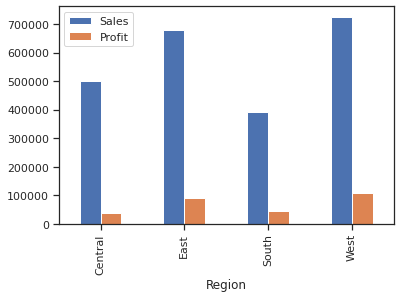

In [ ]:
pd.DataFrame(pr_df.groupby('Region').sum()[['Sales','Profit']]).plot(kind='bar')

* West & East regions have higher sales and profits as compared to other two regions
* Central region has higher sales than the South region but it has shown lower profit gains

### State wise

In [ ]:
#Top 10 states with maximum number of items sold
pr_df.groupby('State').count()['Quantity'].sort_values(ascending= False)[:10]

State
California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: Quantity, dtype: int64

In [ ]:
#Top 10 states with minimum number of items sold
pr_df.groupby('State').count()['Quantity'].sort_values()[:10]

State
Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Vermont                 11
South Dakota            12
Montana                 15
Idaho                   21
Kansas                  24
Name: Quantity, dtype: int64

In [ ]:
#total statewise sales in descending order
state_wise_sales = pd.DataFrame(pr_df.groupby('State').sum()['Sales']).sort_values(by ='Sales',ascending= False)
state_wise_sales.reset_index(inplace=True)
state_wise_sales.head()

State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140

In [ ]:
# Top 10 stores with maximum amount of sales
print('States with maximum amount of sales:\n',state_wise_sales[:10])

print('\n','='*50, '\n')

# Stores with minimum amount of sales
print('States with minimum amount of sales:\n',state_wise_sales[-10:])

States with maximum amount of sales:
           State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   78258.1360
8      Michigan   76269.6140
9      Virginia   70636.7200


States with minimum amount of sales:
                    State     Sales
39            New Mexico  4783.522
40                  Iowa  4579.760
41                 Idaho  4382.486
42                Kansas  2914.310
43  District of Columbia  2865.020
44               Wyoming  1603.136
45          South Dakota  1315.560
46                 Maine  1270.530
47         West Virginia  1209.824
48          North Dakota   919.910


In [ ]:
# Top 10 states with maximum amount of profit
print('States with maximum amount of profit:\n',pr_df.groupby('State').sum()['Profit'].sort_values(ascending= False)[:10])

print('\n','='*50, '\n')

# States with minimum amount of profit
print('States with minimum amount of profit:\n',pr_df.groupby('State').sum()['Profit'].sort_values()[:10])

States with maximum amount of profit:
 State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


States with minimum amount of profit:
 State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64


* The company has highest sales in the state of California which is around
* New York is the state that constitutes the second highest sales for the company
* The states of Texas and Washington end up 3rd and 4th on the chart with around 150k and 140k in sales correspondingly.
* Maximum of the sales are done in the west and the east coast regions.

### Table

In [ ]:
#This is a very cool table that will give us the ability to interact with our data easily
#Click on filter to see more
from google.colab import data_table
data_table.DataTable(raw_df)

In [ ]:
from ipywidgets import widgets,interact
drop_down_values=widgets.Dropdown(options=['Profit','Discount','Sales','Quantity'],value='Quantity')
drop_down_agg=widgets.Dropdown(options=['sum','mean','std'])
drop_down_var1=widgets.Dropdown(options=list(pr_df.describe(include='object').columns),value='City')
drop_down_var2=widgets.Dropdown(options=list(pr_df.describe(include='object').columns),value='Sub-Category')

def crosstab(var1,var2,values,agg):
    return pd.crosstab(pr_df[var1],pr_df[var2],margins=True,values=pr_df[values],aggfunc=agg)

interact(crosstab,var1=drop_down_var1,var2=drop_down_var2,values=drop_down_values,agg=drop_down_agg)

interactive(children=(Dropdown(description='var1', index=7, options=('Order ID', 'Order Date', 'Ship Date', 'S…

<function __main__.crosstab>

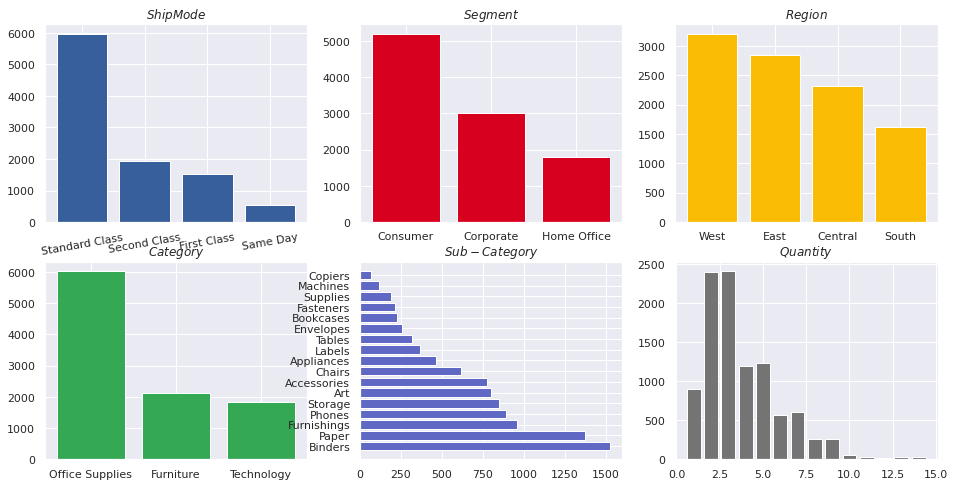

In [ ]:
# lets look at the value_counts() of each column present and get an overall idea
fig,ax=plt.subplots(2,3,figsize=(16,8))
ax[0][0].bar(pr_df['Ship Mode'].value_counts().index,pr_df['Ship Mode'].value_counts().values,color='#375F9B')
ax[0][0].set_title('$Ship Mode$',fontweight='bold')

ax[0][1].bar(pr_df['Segment'].value_counts().index,pr_df['Segment'].value_counts().values,color='#D7001E')
ax[0][1].set_title('$Segment$',fontweight='bold')

ax[0][2].bar(pr_df['Region'].value_counts().index,pr_df['Region'].value_counts().values,color='#fbbc05')
ax[0][2].set_title('$Region$',fontweight='bold')

ax[1][0].bar(pr_df['Category'].value_counts().index,pr_df['Category'].value_counts().values,color='#34a853')
ax[1][0].set_title('$Category$',fontweight='bold')

ax[1][1].barh(pr_df['Sub-Category'].value_counts().index,pr_df['Sub-Category'].value_counts().values,color='#5F68C3')
ax[1][1].set_title('$Sub-Category$',fontweight='bold')

ax[1][2].bar(pr_df['Quantity'].value_counts().index,pr_df['Quantity'].value_counts().values,color='#747474')
ax[1][2].set_title('$Quantity$',fontweight='bold')

plt.sca(ax[0][0])
plt.xticks(rotation=10)

plt.show()

* From the countplots, we can see some of the distribution of the different categories and how they compare to themsleves.

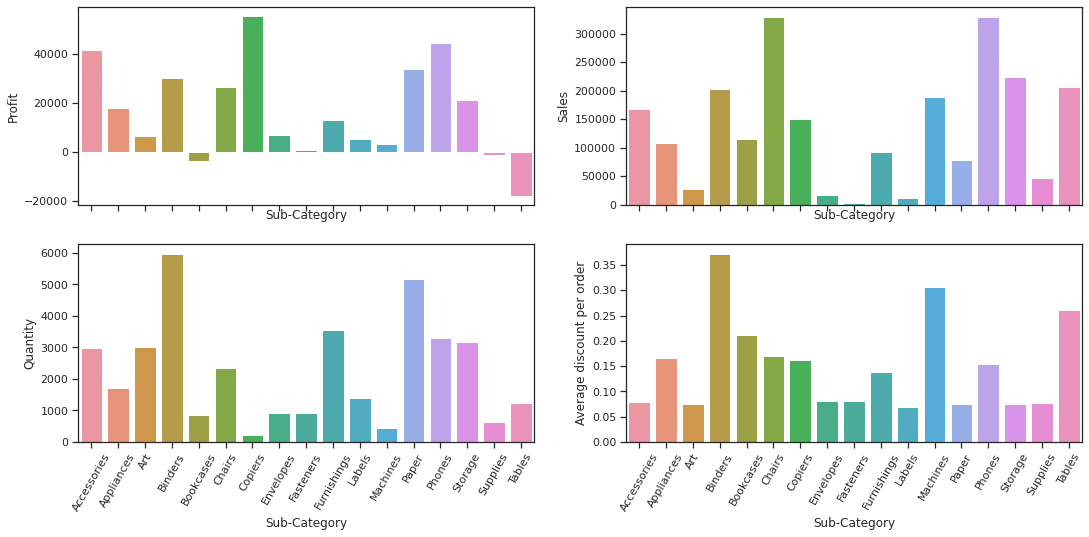

In [ ]:
# lets compare each sub-categories Sales, Profits, Quantity and discount per order by plotting bar graphs
fig,ax=plt.subplots(2,2,figsize=(18,8),sharex=True)
labels=pr_df.groupby(by='Sub-Category').agg('sum').index
sns.barplot(x=pr_df.groupby(by='Sub-Category').agg('sum').index,y=pr_df.groupby(by='Sub-Category').agg('sum').Profit,order=labels,ax=ax[0][0])
sns.barplot(x=pr_df.groupby(by='Sub-Category').agg('sum').index,y=pr_df.groupby(by='Sub-Category').agg('sum').Quantity,order=labels,ax=ax[1][0])
sns.barplot(x=pr_df.groupby(by='Sub-Category').agg('sum').index,y=pr_df.groupby(by='Sub-Category').agg('sum').Sales,order=labels,ax=ax[0][1])
sns.barplot(x=pr_df.groupby(by='Sub-Category').agg('sum').index,y=pr_df.groupby(by='Sub-Category').agg('mean').Discount,order=labels,ax=ax[1][1])
plt.sca(ax[1][1])
plt.ylabel('Average discount per order')
plt.xticks(rotation=60)
plt.sca(ax[1][0])
plt.xticks(rotation=60)
plt.show()

In [ ]:
drop_down=widgets.Dropdown(options=['Sales','Discount','Quantity','Profit'],value='Profit',disabled=False)
drop_down1=widgets.Dropdown(options=['sum','mean'],value='sum',disabled=False)

def data_new(agg_parameter,variable):
    new_data=pr_df.groupby(by=['Region','Category']).agg(agg_parameter)
    hue=[]
    for i in range(len(new_data)):
        hue.append(new_data.index[i][1])
    region=[]
    for i in range(len(new_data)):
        region.append(new_data.index[i][0])
    new_data['region']=region
    new_data['hue']=hue
    
    graph=sns.barplot(data=new_data,y=variable,x='region',hue='hue',palette='viridis')
    graph,plt.legend(bbox_to_anchor=(1,1.02))


interact(data_new,agg_parameter=drop_down1,variable=drop_down)
# sum and Discount gives cumulative discount of all the items ordered (Category like Furniture etc)
# mean gives 'per order' stat as we aggregated by 'mean'

interactive(children=(Dropdown(description='agg_parameter', options=('sum', 'mean'), value='sum'), Dropdown(de…

<function __main__.data_new>

In [ ]:
#Lets look at the disrtibution of sales data according to the sub categories by using the interactive widget to select the category.
Furniture=list(pr_df[pr_df.Category=='Furniture']['Sub-Category'].unique())
Office_Supplies=list(pr_df[pr_df.Category=='Office Supplies']['Sub-Category'].unique())
Technology=list(pr_df[pr_df.Category=='Technology']['Sub-Category'].unique())


from ipywidgets import widgets,interact
drop_down=widgets.Dropdown(description='Sub Category',
                           options=[('furniture',Furniture),('office supplies',Office_Supplies),('technology',Technology)])
# creating a dictionary of the sub-categories and their maximum sales values
max_sales={}
sub=pr_df['Sub-Category'].unique()
for i in sub:
    max_sales[i]=pr_df[pr_df['Sub-Category']==i].Sales.max()
    
def graph(sub_category):
    fig,ax=plt.subplots(1,1,figsize=(16,8))
    sns.kdeplot(data=pr_df[pr_df['Sub-Category'].isin(sub_category)],x='Sales',hue='Sub-Category',ax=ax)
    n=0.0002
    for i in sub_category:
        ax.annotate(f'max {i} Sales ({max_sales[i]})',xy=(max_sales[i],0),xytext=(5000,n),arrowprops=dict(shrink=0.05))
        n+=0.0001
    
interact(graph,sub_category=drop_down)

interactive(children=(Dropdown(description='Sub Category', options=(('furniture', ['Bookcases', 'Chairs', 'Tab…

<function __main__.graph>

In [ ]:
drop_down=widgets.Dropdown(options=list(pr_df['Sub-Category'].unique()))

def graph(sub_category):
    sns.histplot(pr_df[pr_df['Sub-Category']==sub_category].Profit/pr_df[pr_df['Sub-Category']==sub_category].Quantity)

interact(graph,sub_category=drop_down)

interactive(children=(Dropdown(description='sub_category', options=('Bookcases', 'Chairs', 'Labels', 'Tables',…

<function __main__.graph>

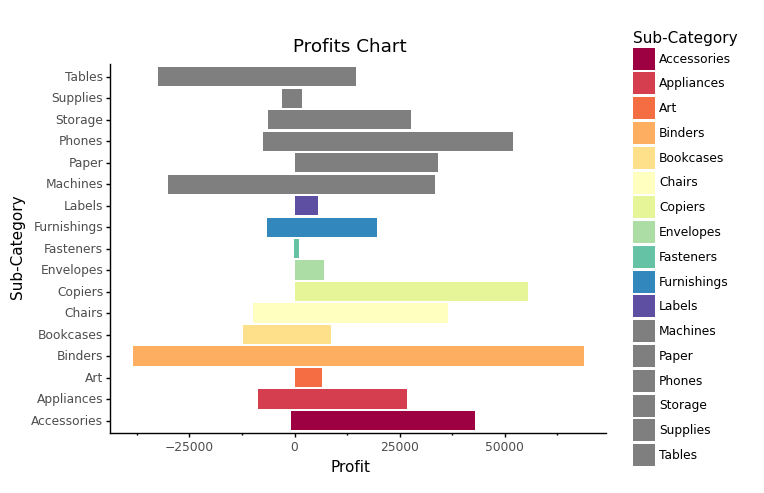

<ggplot: (8776876472609)>

In [ ]:
Profit_plot = (ggplot(pr_df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Profits Chart'))

display(Profit_plot)

# Pre Processing

In [ ]:
def encode_dates(df, column):
    df = df.copy()
    
    df[column] = pd.to_datetime(df[column])
    df[column + '_year'] = df[column].apply(lambda x: x.year)
    df[column + '_month'] = df[column].apply(lambda x: x.month)
    df[column + '_day'] = df[column].apply(lambda x: x.day)
    df = df.drop(column, axis=1)
    return df

def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
def preprocess_inputs(df, drop_cols, encode_cols, prediction_col):
    df = df.copy()
    
    # Drop unnecessary columns
    df = df.drop(drop_cols, axis=1)
    
    
    # Extract date features
    if set(['Order Date','Ship Date']).issubset(df.columns):
      df = encode_dates(df, column='Order Date')
      df = encode_dates(df, column='Ship Date')
    
    # One-hot encode categorical features
    for column in encode_cols:
        df = onehot_encode(df, column=column)
    
    # Split df into X and y
    y = df[prediction_col]
    X = df.drop(prediction_col, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
drop_cols= ['Order ID', 'Customer ID','Row ID', 'Customer Name', 'Country', 'Product Name']
encode_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', ]
prediction_col= 'Sales'

In [ ]:
X_train, X_test, y_train, y_test =preprocess_inputs(raw_df, drop_cols, encode_cols, prediction_col )

In [ ]:
X_train.head(1)

Quantity  Discount    Profit  Order Date_year  Order Date_month  \
0     0.551 -0.755199 -0.082665         1.142593          0.354245   

   Order Date_day  Ship Date_year  Ship Date_month  Ship Date_day  \
0       -0.628414        1.126475         0.370886      -0.102628   

   Ship Mode_First Class  Ship Mode_Same Day  Ship Mode_Second Class  \
0              -0.431039           -0.240344                2.041121   

   Ship Mode_Standard Class  Segment_Consumer  Segment_Corporate  \
0                  -1.21243          0.957582          -0.650534   

   Segment_Home Office  City_Aberdeen  City_Abilene  City_Akron  \
0            -0.470086      -0.011957     -0.011957   -0.039687   

   City_Albuquerque  City_Alexandria  City_Allen  City_Allentown  \
0         -0.033838        -0.037837   -0.020714       -0.026745   

   City_Altoona  City_Amarillo  City_Anaheim  City_Andover  City_Ann Arbor  \
0     -0.016912      -0.033838      -0.05617     -0.020714       -0.020714   

   City_Antioch  City_Apopka  City_Apple Valley  City_Appleton  \
0           0.0      -0.0293           -0.02392      -0.016912   

   City_Arlington  City_Arlington Heights  City_Arvada  City_Asheville  \
0       -0.083123               -0.011957    -0.020714        -0.02392   

   City_Athens  City_Atlanta  City_Atlantic City  City_Auburn  City_Aurora  \
0      -0.0293     -0.062248           -0.011957    -0.052188    -0.083123   

   City_Austin  City_Avondale  City_Bakersfield  City_Baltimore  City_Bangor  \
0     -0.06108       -0.02392          -0.04315       -0.066719     -0.02392   

   City_Bartlett  City_Bayonne  City_Baytown  City_Beaumont  City_Bedford  \
0      -0.011957     -0.020714     -0.011957       -0.02392     -0.020714   

   City_Belleville  City_Bellevue  City_Bellingham  City_Bethlehem  \
0        -0.026745      -0.020714        -0.016912       -0.020714   

   City_Beverly  City_Billings  City_Bloomington  City_Boca Raton  City_Boise  \
0     -0.011957      -0.011957         -0.035893        -0.016912   -0.016912   

   City_Bolingbrook  City_Bossier City  City_Bowling Green  \
0         -0.026745          -0.016912           -0.035893   

   City_Boynton Beach  City_Bozeman  City_Brentwood  City_Bridgeton  \
0           -0.026745     -0.011957       -0.037837       -0.011957   

   City_Bristol  City_Broken Arrow  City_Broomfield  City_Brownsville  \
0      -0.03165          -0.016912        -0.016912         -0.026745   

   City_Bryan  City_Buffalo  City_Buffalo Grove  City_Bullhead City  \
0   -0.020714     -0.033838           -0.011957           -0.016912   

   City_Burbank  City_Burlington  City_Caldwell  City_Camarillo  \
0     -0.020714        -0.054874      -0.016912       -0.026745   

   City_Cambridge  City_Canton  City_Carlsbad  City_Carol Stream  \
0       -0.026745    -0.020714       -0.02392          -0.020714   

   City_Carrollton  City_Cary  City_Cedar Hill  City_Cedar Rapids  \
0        -0.033838  -0.020714        -0.016912          -0.011957   

   City_Champaign  City_Chandler  City_Chapel Hill  City_Charlotte  \
0             0.0       -0.03165         -0.011957       -0.073906   

   City_Charlottesville  City_Chattanooga  City_Chesapeake  City_Chester  \
0             -0.011957          -0.03165        -0.039687     -0.041454   

   City_Cheyenne  City_Chicago  City_Chico  City_Chula Vista  City_Cincinnati  \
0            0.0     -0.181885    -0.03165         -0.020714        -0.039687   

   City_Citrus Heights  City_Clarksville  City_Cleveland  City_Clifton  \
0                  0.0           -0.0293       -0.068848     -0.016912   

   City_Clinton  City_Clovis  City_Coachella  City_College Station  \
0     -0.047881    -0.016912       -0.016912             -0.011957   

   City_Colorado Springs  City_Columbia  City_Columbus  City_Commerce City  \
0              -0.052188       -0.09223       -0.15251                 0.0   

   City_Concord  City_Conroe  City_Conway  City_Coon Rapids  City_Coppell  \
0  

# Models:

In [ ]:
def train_evaluate (X_train, y_train, X_test,y_test ):
  print("***************************Buidling Model*************************************************")
  inputs = tf.keras.Input(shape=(X_train.shape[1],))
  x = tf.keras.layers.Dense(256, activation='relu')(inputs)
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  outputs = tf.keras.layers.Dense(1, activation='linear')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  print(model.summary())
  # print("***************************Compiling Model*************************************************")
  model.compile(optimizer='adam',loss='mse')
  print("***************************Training Model*************************************************")
  history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau()])
  print("***************************Evaluating Model: Loss*************************************************\n")
  test_loss = model.evaluate(X_test, y_test, verbose=0)
  print("Test Loss: {:.5f}".format(test_loss))
  print("***************************Evaluating Model: R^2 Score *************************************************\n")
  y_pred = np.squeeze(model.predict(X_test))
  test_r2 = r2_score(y_test, y_pred)
  print("Test R^2 Score: {:.5f}".format(test_r2))

#Training


###  Different Columns Training
* Let's train our model on different columns and see how it performs.

In [ ]:
# Here are the columns that 
drop_cols= ['Order ID', 'Customer ID','Row ID', 'Customer Name', 'Country', 'Product Name']
encode_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category']
prediction_col= 'Sales'
X_train, X_test, y_train, y_test =preprocess_inputs(raw_df, drop_cols, encode_cols, prediction_col )

train_evaluate (X_train, y_train, X_test,y_test )

Index(['Quantity', 'Discount', 'Profit', 'Order Date_year', 'Order Date_month',
       'Order Date_day', 'Ship Date_year', 'Ship Date_month', 'Ship Date_day',
       'Ship Mode_First Class',
       ...
       'Sub-Category_Envelopes', 'Sub-Category_Fasteners',
       'Sub-Category_Furnishings', 'Sub-Category_Labels',
       'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones',
       'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables'],
      dtype='object', length=3113)
***************************Buidling Model*************************************************
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 3113)]            0         
                                                                 
 dense_18 (Dense)            (None, 256)               797184    
                                                   

In [ ]:
#let's remove date columns if that can help
drop_cols= ['Order ID', 'Customer ID','Row ID', 'Customer Name', 'Country', 'Product Name', 'Order Date','Ship Date']
encode_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category']
prediction_col= 'Sales'
X_train, X_test, y_train, y_test =preprocess_inputs(raw_df, drop_cols, encode_cols, prediction_col )
train_evaluate (X_train, y_train, X_test,y_test )

***************************Buidling Model*************************************************
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3107)]            0         
                                                                 
 dense_24 (Dense)            (None, 256)               795648    
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 dense_26 (Dense)            (None, 1)                 257       
                                                                 
Total params: 861,697
Trainable params: 861,697
Non-trainable params: 0
_________________________________________________________________
None
***************************Compiling Model***********************************************

* We can see that the r^2 score has increased from  **0.19580 =====> 0.34342**, meaning that date columns are not helpful for predicting the sales.
* We are going to remove them from further analysis 

In [ ]:
#let's remove 'Postal Code' column if that can help
drop_cols= ['Order ID', 'Customer ID','Row ID', 'Customer Name', 'Country', 'Product Name', 'Order Date','Ship Date',  'Postal Code']
encode_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category']
prediction_col= 'Sales'
X_train, X_test, y_train, y_test =preprocess_inputs(raw_df, drop_cols, encode_cols, prediction_col )
train_evaluate (X_train, y_train, X_test,y_test )

***************************Buidling Model*************************************************
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2476)]            0         
                                                                 
 dense_27 (Dense)            (None, 256)               634112    
                                                                 
 dense_28 (Dense)            (None, 256)               65792     
                                                                 
 dense_29 (Dense)            (None, 1)                 257       
                                                                 
Total params: 700,161
Trainable params: 700,161
Non-trainable params: 0
_________________________________________________________________
None
***************************Compiling Model***********************************************

* We can see that the r^2 score has increased from  **0.34342 =====> 0.39671**, meaning that *'Postal Code'* column is not helpful for predicting the sales.
* We are going to remove them it further analysis 

In [ ]:
#let's remove 'City' column if that can help
drop_cols= ['Order ID', 'Customer ID','Row ID', 'Customer Name', 'Country', 'Product Name', 'Order Date','Ship Date',  'Postal Code',  'City',]
encode_cols = ['Ship Mode', 'Segment', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category']
prediction_col= 'Sales'
X_train, X_test, y_train, y_test =preprocess_inputs(raw_df, drop_cols, encode_cols, prediction_col )
train_evaluate (X_train, y_train, X_test,y_test )

***************************Buidling Model*************************************************
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1945)]            0         
                                                                 
 dense_30 (Dense)            (None, 256)               498176    
                                                                 
 dense_31 (Dense)            (None, 256)               65792     
                                                                 
 dense_32 (Dense)            (None, 1)                 257       
                                                                 
Total params: 564,225
Trainable params: 564,225
Non-trainable params: 0
_________________________________________________________________
None
***************************Training Model***********************************************

* We can see that the r^2 score has increased from  **0.39671 =====> 0.40795**, meaning that *'City'* column is not helpful for predicting the sales.
* We are going to remove  it from further analysis 

What Is a Good R-Squared Value?
What qualifies as a “good” R-Squared value will depend on the context. In some fields, such as the social sciences, even a relatively low R-Squared such as 0.5 could be considered relatively strong. In other fields, the standards for a good R-Squared reading can be much higher, such as 0.9 or above. In finance, an R-Squared above 0.7 would generally be seen as showing a high level of correlation, whereas a measure below 0.4 would show a low correlation. This is not a hard rule, however, and will depend on the specific analysis.

In [ ]:
#let's remove 'Product ID' column if that can help
drop_cols= ['Order ID', 'Customer ID','Row ID', 'Customer Name', 'Country', 'Product Name', 'Order Date','Ship Date',  'Postal Code',  'City','Product ID',]
encode_cols = ['Ship Mode', 'Segment', 'State', 'Region',  'Category', 'Sub-Category']
prediction_col= 'Sales'
X_train, X_test, y_train, y_test =preprocess_inputs(raw_df, drop_cols, encode_cols, prediction_col )
train_evaluate (X_train, y_train, X_test,y_test )

***************************Buidling Model*************************************************
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 83)]              0         
                                                                 
 dense_33 (Dense)            (None, 256)               21504     
                                                                 
 dense_34 (Dense)            (None, 256)               65792     
                                                                 
 dense_35 (Dense)            (None, 1)                 257       
                                                                 
Total params: 87,553
Trainable params: 87,553
Non-trainable params: 0
_________________________________________________________________
None
***************************Training Model*************************************************

* That is better

In [ ]:
#let's remove 'Sub-Category' column if that can help
drop_cols= ['Order ID', 'Customer ID','Row ID', 'Customer Name', 'Country', 'Product Name', 'Order Date','Ship Date',  'Postal Code',  'City','Product ID','Sub-Category']
encode_cols = ['Ship Mode', 'Segment', 'State', 'Region',  'Category', ]
prediction_col= 'Sales'
X_train, X_test, y_train, y_test =preprocess_inputs(raw_df, drop_cols, encode_cols, prediction_col )
train_evaluate (X_train, y_train, X_test,y_test )

***************************Buidling Model*************************************************
Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 66)]              0         
                                                                 
 dense_36 (Dense)            (None, 256)               17152     
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
                                                                 
 dense_38 (Dense)            (None, 1)                 257       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________
None
***************************Training Model*************************************************

* We can see that the r^2 score has decreased from  ** 0.45886 =====> 0.44548**, meaning that *'Sub-Category'* column is  helpful for predicting the sales.
* We are going to keep  it from further analysis 

In [ ]:
#let's remove 'Ship Mode', column if that can help
drop_cols= ['Order ID', 'Customer ID','Row ID', 'Customer Name', 'Country', 'Product Name', 'Order Date','Ship Date',  'Postal Code',  'City','Product ID','Ship Mode',]
encode_cols = [ 'Segment', 'State', 'Region',  'Category','Sub-Category' ]
prediction_col= 'Sales'
X_train, X_test, y_train, y_test =preprocess_inputs(raw_df, drop_cols, encode_cols, prediction_col )
train_evaluate (X_train, y_train, X_test,y_test )

***************************Buidling Model*************************************************
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 79)]              0         
                                                                 
 dense_39 (Dense)            (None, 256)               20480     
                                                                 
 dense_40 (Dense)            (None, 256)               65792     
                                                                 
 dense_41 (Dense)            (None, 1)                 257       
                                                                 
Total params: 86,529
Trainable params: 86,529
Non-trainable params: 0
_________________________________________________________________
None
***************************Training Model*************************************************

## Making training process  interactive:
It is a lot of work to copy and past the same code many tiems, lets make it interactive that way we don't have to do the same thing again and gaian

In [ ]:
from ipywidgets import Button, HBox, VBox
encode_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', ]

checkboxes = [widgets.Checkbox(value=True, description=label) for label in encode_cols]
print("Please select the columns that you want include in the data analysis:")
print("* Default Included:")
HBox([VBox([checkboxes[0], checkboxes[4], checkboxes[8], ]),
      VBox([checkboxes[1], checkboxes[5],]) ,
      VBox([checkboxes[2], checkboxes[6],]),
      VBox([checkboxes[3], checkboxes[7], ])])

Please select the columns that you want include in the data analysis:
* Default Included:


* Three numerice variables are also part of the model

### Helper Functions

In [ ]:
def get_drop_encode_cols(df_columns, checkboxes ):
  encoded_cols = []
  for i in range(0, len(checkboxes)):
      if checkboxes[i].value == True:
        encoded_cols = encoded_cols + [checkboxes[i].description]
  dropping_cols = [x for x in df_columns.tolist() if x not in encoded_cols]
  dropping_cols.remove('Sales')
  dropping_cols.remove('Quantity')
  dropping_cols.remove('Discount')
  dropping_cols.remove('Profit')
  return dropping_cols, encoded_cols

In [ ]:
def run_train(raw_df,drop_cols, encode_cols, prediction_col):
  print("Dropping this columns : " )
  print( drop_cols)
  print("Encoding these columns : ")
  print(encode_cols)
  print("Predictiong " )
  print(prediction_col)
  X_train, X_test, y_train, y_test =preprocess_inputs(raw_df, drop_cols, encode_cols, prediction_col )

  train_evaluate (X_train, y_train, X_test,y_test )


### Training

In [ ]:
dropping_cols, encoded_cols=get_drop_encode_cols(raw_df.columns, checkboxes )
run_train(raw_df,dropping_cols, encoded_cols, "Sales")

Dropping this columns : 
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Product ID', 'Product Name']
Encoding these columns : 
['Segment', 'Region', 'Category', 'Sub-Category']
Predictiong 
Sales
***************************Buidling Model*************************************************
Model: "model_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_150 (Dense)           (None, 256)               7936      
                                                                 
 dense_151 (Dense)           (None, 256)               65792     
                                                                 
 dense_152 (Dense)           (None, 1)                 257       
         

## Taking Care of Outliers import seaborn as sns


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

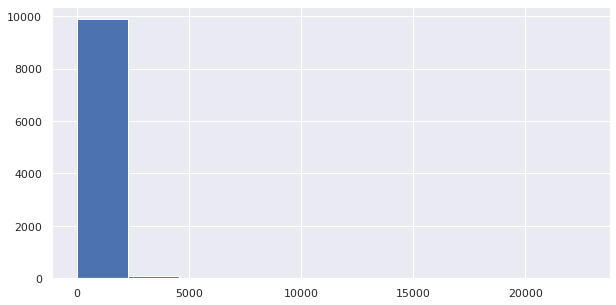

In [ ]:
raw_df['Sales'].hist() 

* We see that the sales are concentrated around 5000 
* So,let's try removing all the sales above 5000 and see how our model performs

In [ ]:
test_df= raw_df[raw_df["Sales"]<4000]
dropping_cols, encoded_cols=get_drop_encode_cols(test_df.columns, checkboxes )
run_train(raw_df,dropping_cols, encoded_cols, "Sales")

Dropping this columns : 
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Product ID', 'Product Name']
Encoding these columns : 
['Segment', 'Region', 'Category', 'Sub-Category']
Predictiong 
Sales
***************************Buidling Model*************************************************
Model: "model_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_52 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_153 (Dense)           (None, 256)               7936      
                                                                 
 dense_154 (Dense)           (None, 256)               65792     
                                                                 
 dense_155 (Dense)           (None, 1)                 257       
         

* This shows improvement compared to the previous training: Our previous R^2 score was: 0.75688 and by removing outliers we got: 0.79374 

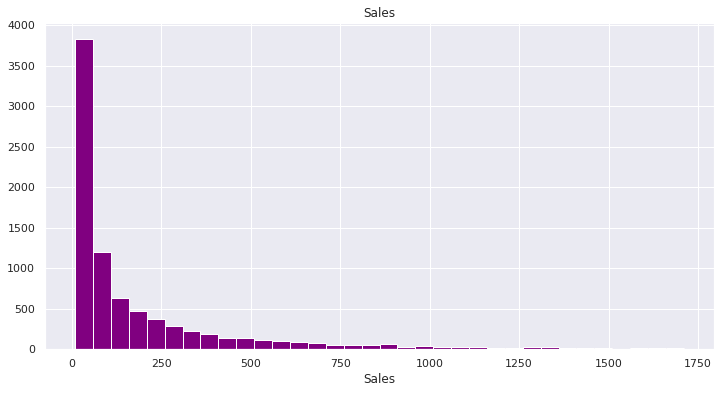

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Sales")
plt.xlabel('Sales')
plt.hist(raw_df.Sales, bins=np.arange(10,1750,50), color='purple');

In [ ]:
test_df= raw_df[raw_df["Sales"]<2000]

In [ ]:

dropping_cols, encoded_cols=get_drop_encode_cols(test_df.columns, checkboxes )
run_train(test_df,dropping_cols, encoded_cols, "Sales")

Dropping this columns : 
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Product ID', 'Product Name']
Encoding these columns : 
['Segment', 'Region', 'Category', 'Sub-Category']
Predictiong 
Sales
***************************Buidling Model*************************************************
Model: "model_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_64 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_189 (Dense)           (None, 256)               7936      
                                                                 
 dense_190 (Dense)           (None, 256)               65792     
                                                                 
 dense_191 (Dense)           (None, 1)                 257       
         

* This shows improvement


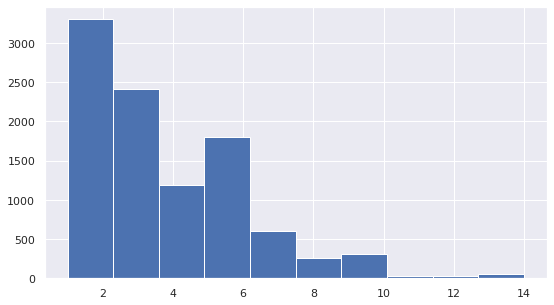

In [ ]:
raw_df['Quantity'].hist() 

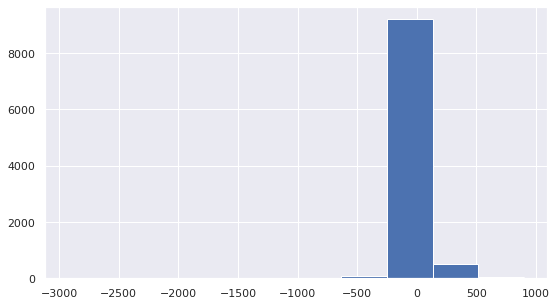

In [ ]:
test_df['Profit'].hist() 

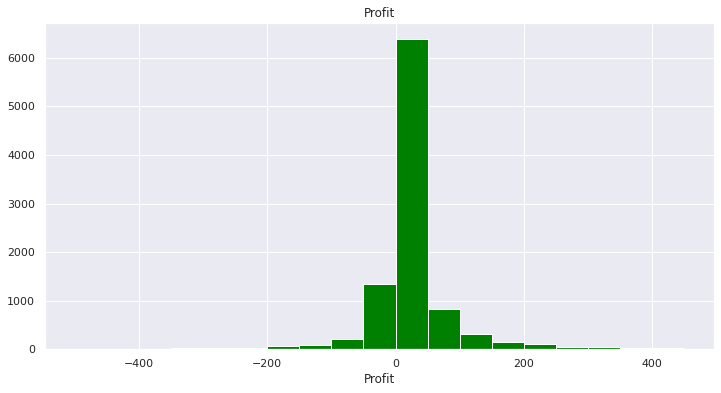

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Profit")
plt.xlabel('Profit')
plt.hist(test_df.Profit, bins=np.arange(-500,500,50), color='green');

* I would say any porfit lower than -200 would be consider outlier

In [ ]:
test1_df= test_df[test_df["Profit"]>-200]

In [ ]:
dropping_cols, encoded_cols=get_drop_encode_cols(test1_df.columns, checkboxes )
run_train(test1_df,dropping_cols, encoded_cols, "Sales")

Dropping this columns : 
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Product ID', 'Product Name']
Encoding these columns : 
['Segment', 'Region', 'Category', 'Sub-Category']
Predictiong 
Sales
***************************Buidling Model*************************************************
Model: "model_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_65 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_192 (Dense)           (None, 256)               7936      
                                                                 
 dense_193 (Dense)           (None, 256)               65792     
                                                                 
 dense_194 (Dense)           (None, 1)                 257       
         

* We have improved

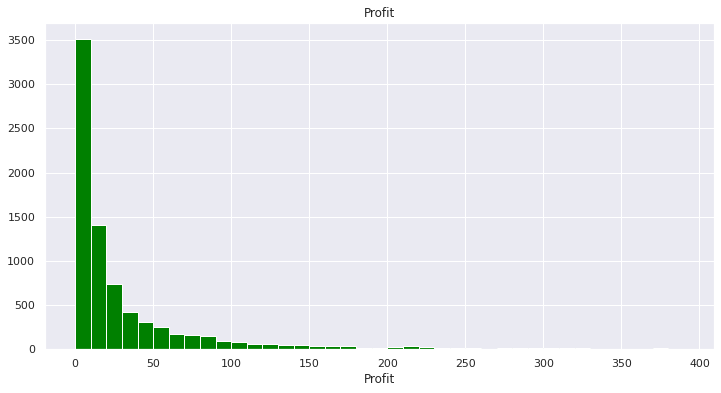

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Profit")
plt.xlabel('Profit')
plt.hist(test_df.Profit, bins=np.arange(0,400,10), color='green');

* We might want to explore this a bit more, but for now let's say that is enough

# Conclusion

* I have used the Superstore Dataset to predict sales values based on categorical values
* Firs, with did many exploration to get a sense of the data
* Then I  created model
* To make it easy to play with the model and make my codes modular and reusable, I used functions that get parmeteres for columns and process them accordingly
* To make the model training interactiv I implemented the ipython widgets to interact with model columns, this helped us to train faster and understand the impact of our changes faster
* Different columns had different results untill we got to the columns which were the most useful
* Then we played on outlier detecation
* Using outlier detection we have improved r^2 score from 4.~ to 8.3~
* There are description on each section too, regarding implementation details
Still there is a lot of room for improvement, in the interest of time, I stop here.
Thanks